# https://docs.google.com/presentation/d/1LosjT-hAPLtY7XzgWJwtNJEhYZb0WOaJnWLjcfOzhSs/edit?usp=sharing

In [1]:
api_key = "67f673c20915f8c42bb43d173f2a926c"

In [2]:
#imports
import requests
import pickle
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import locale
from matplotlib.ticker import FuncFormatter
! pip install iso639
from collections import Counter
%matplotlib inline


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Funzioni

In [3]:
# Funzione per formattare l'asse y in miliardi
def bilioni_formatter(x, pos):
    return f'{x / 1e9:.1f}'

# Funzione per formattare l'asse y in milioni
def milioni_formatter(x, pos):
    return f'{x / 1e6:.1f}'

## Data gathering

In [4]:
#dati già raccolti 
"""
def get_movie_data(api_key,page):
    base_url = "https://api.themoviedb.org/3"
    endpoint = "/discover/movie"
    #https://api.themoviedb.org/3/discover/movie

    params = {
        "api_key": api_key,
        "page":page
    }

    try:
        response = requests.get(base_url + endpoint, params=params)
        response.raise_for_status()  # Controlla se la richiesta ha avuto successo, altrimenti solleverà un'eccezione
        data = response.json()
        return data["results"]
    except requests.exceptions.RequestException as e:
        print("Errore durante la richiesta:", e)
        return None
"""

'\ndef get_movie_data(api_key,page):\n    base_url = "https://api.themoviedb.org/3"\n    endpoint = "/discover/movie"\n    #https://api.themoviedb.org/3/discover/movie\n\n    params = {\n        "api_key": api_key,\n        "page":page\n    }\n\n    try:\n        response = requests.get(base_url + endpoint, params=params)\n        response.raise_for_status()  # Controlla se la richiesta ha avuto successo, altrimenti solleverà un\'eccezione\n        data = response.json()\n        return data["results"]\n    except requests.exceptions.RequestException as e:\n        print("Errore durante la richiesta:", e)\n        return None\n'

In [5]:
"""
#https://api.themoviedb.org/3/movie/{movie_id}

def get_movie_details(movie_id):
    base_url = "https://api.themoviedb.org/3"
    endpoint = f"/movie/{movie_id}"

    params = {
        "api_key": api_key
    }

    try:
        response = requests.get(base_url + endpoint, params=params)
        response.raise_for_status()  # Controlla se la richiesta ha avuto successo, altrimenti solleverà un'eccezione
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print("Errore durante la richiesta:", e)
        return None
"""

'\n#https://api.themoviedb.org/3/movie/{movie_id}\n\ndef get_movie_details(movie_id):\n    base_url = "https://api.themoviedb.org/3"\n    endpoint = f"/movie/{movie_id}"\n\n    params = {\n        "api_key": api_key\n    }\n\n    try:\n        response = requests.get(base_url + endpoint, params=params)\n        response.raise_for_status()  # Controlla se la richiesta ha avuto successo, altrimenti solleverà un\'eccezione\n        data = response.json()\n        return data\n    except requests.exceptions.RequestException as e:\n        print("Errore durante la richiesta:", e)\n        return None\n'

In [6]:
"""
page = 1
movies = []
movie = {}
while page <= 500:
    for x in get_movie_data(api_key,page):
        movies.append(get_movie_details(x['id']))
        #movie[x['id']] = movie
        movie[x['id']] = get_movie_details(x['id'])
    page=page+1

if movies:
    print("Elenco di film:")
    print(len(movies))

"""

'\npage = 1\nmovies = []\nmovie = {}\nwhile page <= 500:\n    for x in get_movie_data(api_key,page):\n        movies.append(get_movie_details(x[\'id\']))\n        #movie[x[\'id\']] = movie\n        movie[x[\'id\']] = get_movie_details(x[\'id\'])\n    page=page+1\n\nif movies:\n    print("Elenco di film:")\n    print(len(movies))\n\n'

### Sezione salva/carica file locali

In [7]:
#salvo in un file final_movie_list
"""
with open("movies.json", "w") as file:
    json.dump(movie, file)
pickle.dump(movies, open('movie.pkl','wb'))
#movies = pickle.load(open('movie_list.pkl','rb'))
"""

'\nwith open("movies.json", "w") as file:\n    json.dump(movie, file)\npickle.dump(movies, open(\'movie.pkl\',\'wb\'))\n#movies = pickle.load(open(\'movie_list.pkl\',\'rb\'))\n'

In [8]:
"""
def save_dict_to_csv(data_dict, file_name):
    # Extract the keys from the dictionary to use as column headers
    fieldnames = data_dict

    # Extract the values from the dictionary to use as rows in the CSV
    rows = data_dict

    # Write the data to the CSV file
    with open(file_name, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(fieldnames)
        writer.writerows(rows)


# Save the dictionary to CSV
csv_file_name = "movie_data.csv"
save_dict_to_csv(movies, csv_file_name)
"""

'\ndef save_dict_to_csv(data_dict, file_name):\n    # Extract the keys from the dictionary to use as column headers\n    fieldnames = data_dict\n\n    # Extract the values from the dictionary to use as rows in the CSV\n    rows = data_dict\n\n    # Write the data to the CSV file\n    with open(file_name, \'w\', newline=\'\') as csvfile:\n        writer = csv.writer(csvfile)\n        writer.writerow(fieldnames)\n        writer.writerows(rows)\n\n\n# Save the dictionary to CSV\ncsv_file_name = "movie_data.csv"\nsave_dict_to_csv(movies, csv_file_name)\n'

In [9]:
"""
def save_array_to_csv(data_array, file_name):
    with open(file_name, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for row in data_array:
            writer.writerow(row)


# Save the array to CSV
csv_file_name = "movies_data.csv"
save_array_to_csv(movies, csv_file_name)
"""

'\ndef save_array_to_csv(data_array, file_name):\n    with open(file_name, \'w\', newline=\'\') as csvfile:\n        writer = csv.writer(csvfile)\n        for row in data_array:\n            writer.writerow(row)\n\n\n# Save the array to CSV\ncsv_file_name = "movies_data.csv"\nsave_array_to_csv(movies, csv_file_name)\n'

In [10]:
"""
def save_array_of_dicts_to_csv(data_array, file_name):
    # Ottenere le chiavi uniche da tutti i dizionari
    fieldnames = set().union(*data_array)

    # Scrivere il file CSV
    with open(file_name, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data_array)

# Esempio di array con dizionari contenenti i dati
data_array = [
    {"Title": "Film 1", "Year": 2023, "Genre": "Action"},
    {"Title": "Film 2", "Year": 2022, "Genre": "Comedy"},
    {"Title": "Film 3", "Year": 2021, "Genre": "Drama"}
]

# Salvare l'array di dizionari in un file CSV
csv_file_name = "movies_data.csv"
save_array_of_dicts_to_csv(movies, csv_file_name)
"""

'\ndef save_array_of_dicts_to_csv(data_array, file_name):\n    # Ottenere le chiavi uniche da tutti i dizionari\n    fieldnames = set().union(*data_array)\n\n    # Scrivere il file CSV\n    with open(file_name, \'w\', newline=\'\') as csvfile:\n        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)\n        writer.writeheader()\n        writer.writerows(data_array)\n\n# Esempio di array con dizionari contenenti i dati\ndata_array = [\n    {"Title": "Film 1", "Year": 2023, "Genre": "Action"},\n    {"Title": "Film 2", "Year": 2022, "Genre": "Comedy"},\n    {"Title": "Film 3", "Year": 2021, "Genre": "Drama"}\n]\n\n# Salvare l\'array di dizionari in un file CSV\ncsv_file_name = "movies_data.csv"\nsave_array_of_dicts_to_csv(movies, csv_file_name)\n'

### Carica dati

In [11]:
# Carica il JSON dal file locale
file_path = "movies.json"
with open(file_path, 'r') as json_file:
    data = json.load(json_file)


In [12]:
#Carica il file csv locale
df=pd.read_csv("movies_data.csv")

### Pulizia dei dati

In [13]:
#pulizia dei dati del dataframe
print(len(df))
# Filtra ed elimina i dati con campi vuoti o uguali a 0
columns_to_check = ["budget", "title", "release_date", "runtime", "genres", "original_language"]
df = df.dropna(subset=columns_to_check)

# Rimuovi le righe in cui i campi "budget", "runtime" e "revenue" sono uguali a 0
df = df[df["budget"] != 0]
df = df[df["runtime"] != 0]

# Mostra il DataFrame risultante
print(len(df))

10000
5361


In [14]:
#pulizia dei dati del json
print(len(data))
film_da_rimuovere = []
for film, dati in data.items():
    # Verifica se tutti i campi specificati sono vuoti o nulli o se il budget è uguale a 0
    if (
        not dati.get("budget") or dati.get("budget") == 0 or
        not dati.get("title") or
        not dati.get("release_date") or
        not dati.get("runtime") or dati.get("runtime") == 0 or
        not dati.get("genres") or
        not dati.get("original_language")
    ):
        film_da_rimuovere.append(film)      
for film in film_da_rimuovere:
    del data[film]
print(len(data))

10000
5359


In [15]:
#filtro per i film anno 2023
#pulizia dei dati del dataframe
print(len(df))
# Filtra ed elimina i dati con campi vuoti o uguali a 0

df["release_date"] = pd.to_datetime(df["release_date"])
# Rimuovi le righe in cui i campi "budget", "runtime" e "revenue" sono uguali a 0
df = df[df["release_date"].dt.year != 2023]

# Mostra il DataFrame risultante
print(len(df))

5361
5281


### Distribuzione film per genere

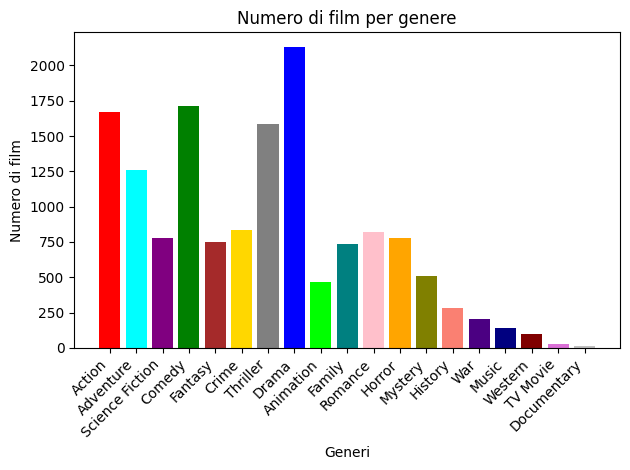

In [16]:
def get_movie_genres_count(data):
    genre_count = {}

    for movie in data.values():
        #print(movie)
        genres = movie.get('genres', [])  # Ottieni la lista dei generi dal film
        #print(genres)
        for genre in genres:
            genre_name = genre.get('name')
            genre_count[genre_name] = genre_count.get(genre_name, 0) + 1

    return genre_count

# Definizione dei colori per i generi
genre_colors = {
    'Action': 'red',
    'Drama': 'blue',
    'Comedy': 'green',
    'Science Fiction': 'purple',
    'Horror': 'orange',
    'Adventure': 'cyan',
    'Romance': 'pink',
    'Thriller': 'gray',
    'Fantasy': 'brown',
    'Mystery': 'olive',
    'Crime': 'gold',
    'Animation': 'lime',
    'Family': 'teal',
    'Music': 'navy',
    'War': 'indigo',
    'Western': 'maroon',
    'History': 'salmon',
    'Documentary': 'silver',
    'TV Movie': 'orchid'
}

def create_bar_chart(genre_count):
    genres = list(genre_count.keys())
    counts = list(genre_count.values())

    # Estrai i colori corrispondenti ai generi
    colors = [genre_colors.get(genre, 'black') for genre in genres]

    plt.bar(genres, counts, color=colors)
    plt.xlabel('Generi')
    plt.ylabel('Numero di film')
    plt.title('Numero di film per genere')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Ottieni il conteggio dei generi
genre_count = get_movie_genres_count(data)
# Crea e mostra il grafico a barre
create_bar_chart(genre_count)

### Differenza dei generi nei periodi prima, durante e dopo il covid

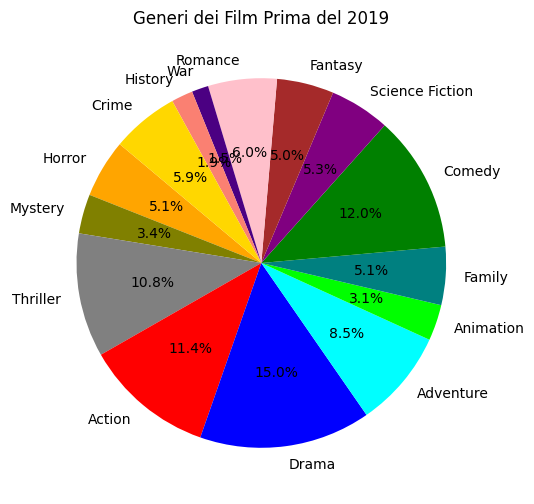

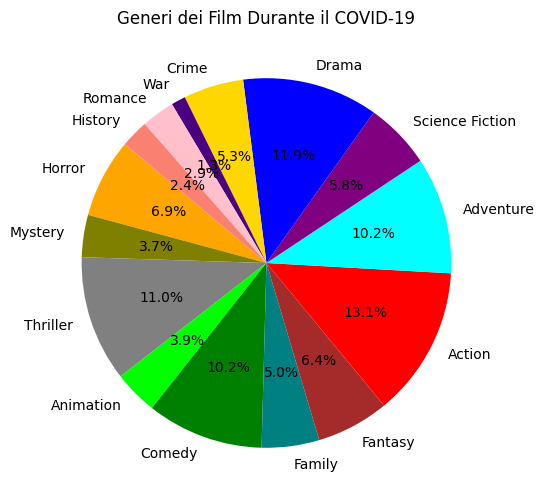

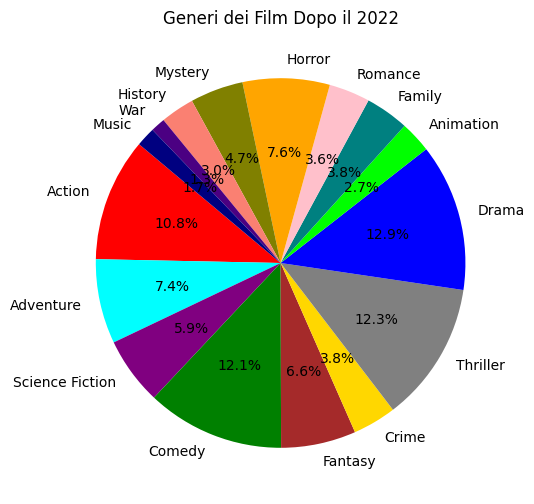

In [17]:
# Funzione per creare un grafico a torta
def create_pie_chart(genres, title):
    genre_count = {}
    total_movies = len(genres)
    for movie in genres:
        for genre in movie:
            genre_name = genre['name']
            genre_count[genre_name] = genre_count.get(genre_name, 0) + 1
    
    filtered_genre_count = {genre: count for genre, count in genre_count.items() if (count / total_movies) >= 0.03}

    labels = list(filtered_genre_count.keys())
    sizes = list(filtered_genre_count.values())

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=[genre_colors[label] for label in labels])
    plt.title(title)
    plt.show()

# Definizione dei colori per i generi
genre_colors = {
    'Action': 'red',
    'Drama': 'blue',
    'Comedy': 'green',
    'Science Fiction': 'purple',
    'Horror': 'orange',
    'Adventure': 'cyan',
    'Romance': 'pink',
    'Thriller': 'gray',
    'Fantasy': 'brown',
    'Mystery': 'olive',
    'Crime': 'gold',
    'Animation': 'lime',
    'Family': 'teal',
    'Music': 'navy',
    'War': 'indigo',
    'Western': 'maroon',
    'History': 'salmon',
    'Documentary': 'silver',
    'TV Movie': 'orchid'
}

# Filtraggio e creazione dei grafici a torta
movies_before_2019 = {k: v for k, v in data.items() if v['release_date'] < '2019-01-01'}
create_pie_chart([movie['genres'] for movie in movies_before_2019.values()], 'Generi dei Film Prima del 2019')

movies_during_covid = {k: v for k, v in data.items() if '2019-02-01' <= v['release_date'] <= '2022-06-30'}
create_pie_chart([movie['genres'] for movie in movies_during_covid.values()], 'Generi dei Film Durante il COVID-19')

movies_after_2022 = {k: v for k, v in data.items() if v['release_date'] > '2022-06-30'}
create_pie_chart([movie['genres'] for movie in movies_after_2022.values()], 'Generi dei Film Dopo il 2022')

### Distribuzione dei film per intervallo di budget

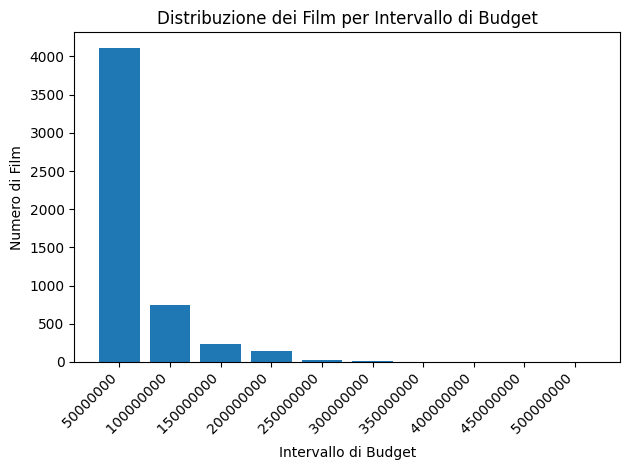

In [18]:
#test su distribuzione budget
locale.setlocale(locale.LC_ALL, '')

# Definisci gli intervalli di budget
intervalli_budget = [0, 50000000, 100000000, 150000000, 200000000, 250000000, 300000000, 350000000, 400000000, 450000000, 500000000]

# Crea una nuova colonna nel DataFrame che indica l'intervallo di budget per ogni film
df["intervallo_budget"] = pd.cut(df["budget"], intervalli_budget)

# Calcola la quantità di film per ogni intervallo di budget
quantita_per_intervallo = df["intervallo_budget"].value_counts().sort_index()

# Crea il grafico a barre
plt.bar(range(len(quantita_per_intervallo)), quantita_per_intervallo)

# Aggiungi etichette agli assi
plt.xlabel("Intervallo di Budget")
plt.ylabel("Numero di Film")
plt.title("Distribuzione dei Film per Intervallo di Budget")
# Ruota le etichette dell'asse x di 45 gradi e formatta i numeri con i punti
formatted_labels = [str(interval).split(",")[1].strip("]") if True else str(interval)
                    for i, interval in enumerate(quantita_per_intervallo.index)]
plt.xticks(range(len(quantita_per_intervallo)), formatted_labels, rotation=45, ha='right')


# Mostra il grafico
plt.tight_layout()  # Aggiunge spazio tra le etichette e i bordi del grafico
plt.show()

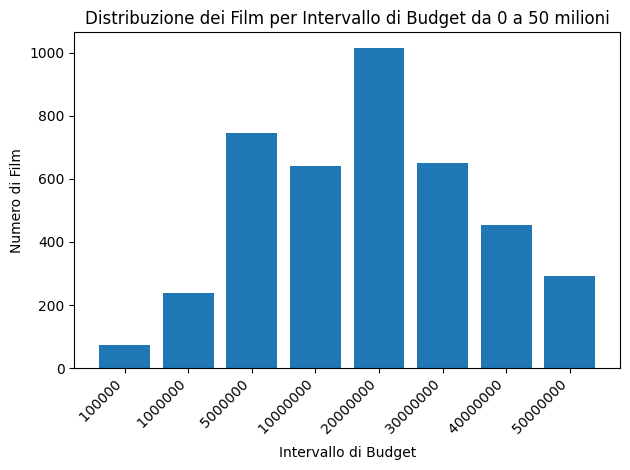

In [19]:
#test su distribuzione budget
locale.setlocale(locale.LC_ALL, '')

# Definisci gli intervalli di budget
intervalli_budget = [0, 100000, 1000000, 5000000, 10000000, 20000000, 30000000, 40000000, 50000000]

# Crea una nuova colonna nel DataFrame che indica l'intervallo di budget per ogni film
df["intervallo_budget"] = pd.cut(df["budget"], intervalli_budget)

# Calcola la quantità di film per ogni intervallo di budget
quantita_per_intervallo = df["intervallo_budget"].value_counts().sort_index()

# Crea il grafico a barre
plt.bar(range(len(quantita_per_intervallo)), quantita_per_intervallo)

# Aggiungi etichette agli assi
plt.xlabel("Intervallo di Budget")
plt.ylabel("Numero di Film")
plt.title("Distribuzione dei Film per Intervallo di Budget da 0 a 50 milioni")
# Ruota le etichette dell'asse x di 45 gradi e formatta i numeri con i punti
formatted_labels = [str(interval).split(",")[1].strip("]") if True else str(interval)
                    for i, interval in enumerate(quantita_per_intervallo.index)]
plt.xticks(range(len(quantita_per_intervallo)), formatted_labels, rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()  # Aggiunge spazio tra le etichette e i bordi del grafico
plt.show()

### Distribuzione dei film per intervallo di ricavo

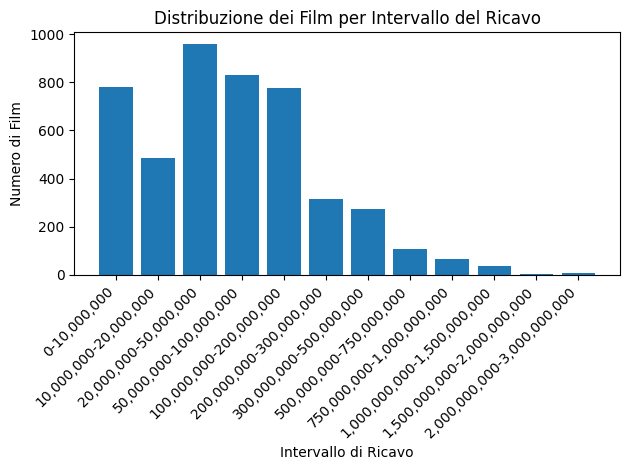

In [20]:
#test su distribuzione ricavi
locale.setlocale(locale.LC_ALL, '')

# Definisci gli intervalli di budget
intervalli_budget = [0, 10000000, 20000000 ,50000000, 100000000, 200000000, 300000000, 500000000, 750000000, 1000000000, 1500000000, 2000000000, 3000000000]

# Crea una nuova colonna nel DataFrame che indica l'intervallo di budget per ogni film
df["intervallo_budget"] = pd.cut(df["revenue"], intervalli_budget)

# Calcola la quantità di film per ogni intervallo di budget
quantita_per_intervallo = df["intervallo_budget"].value_counts().sort_index()

# Crea il grafico a barre
plt.bar(range(len(quantita_per_intervallo)), quantita_per_intervallo)

# Aggiungi etichette agli assi
plt.xlabel("Intervallo di Ricavo")
plt.ylabel("Numero di Film")
plt.title("Distribuzione dei Film per Intervallo del Ricavo")
# Ruota le etichette dell'asse x di 45 gradi e formatta i numeri con i punti
formatted_labels = [locale.format_string("%d", int(interval.left), grouping=True) + "-" +
                    locale.format_string("%d", int(interval.right), grouping=True)
                    for interval in quantita_per_intervallo.index]
plt.xticks(range(len(quantita_per_intervallo)), formatted_labels, rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()  # Aggiunge spazio tra le etichette e i bordi del grafico
plt.show()

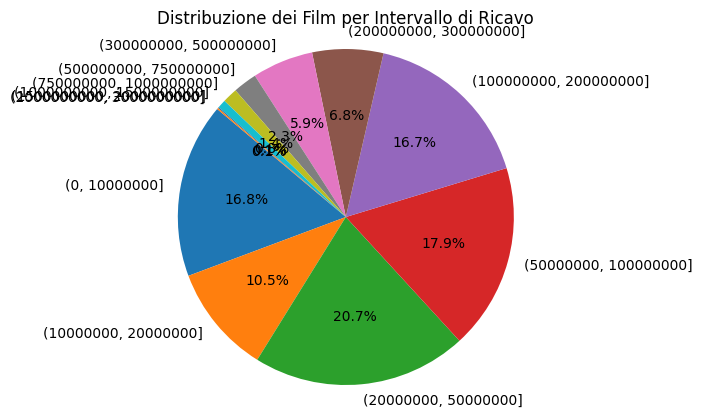

In [21]:
# Definisci gli intervalli di ricavo
intervalli_ricavo = [0, 10000000, 20000000 ,50000000, 100000000, 200000000, 300000000, 500000000, 750000000, 1000000000, 1500000000, 2000000000, 3000000000]

# Crea una nuova colonna nel DataFrame che indica l'intervallo di ricavo per ogni film
df["intervallo_ricavo"] = pd.cut(df["revenue"], bins=intervalli_ricavo)

# Calcola la quantità di film per ogni intervallo di ricavo
quantita_per_intervallo = df["intervallo_ricavo"].value_counts().sort_index()

# Crea il grafico a torta
plt.pie(quantita_per_intervallo, labels=quantita_per_intervallo.index,
        autopct=lambda p: locale.format_string('%.1f%%', p), startangle=140)

# Aggiungi un titolo al grafico
plt.title("Distribuzione dei Film per Intervallo di Ricavo")

# Mostra il grafico
plt.axis('equal')  # Assicura che il grafico sia disegnato come un cerchio
plt.show()

### Distribuzione delle lingue

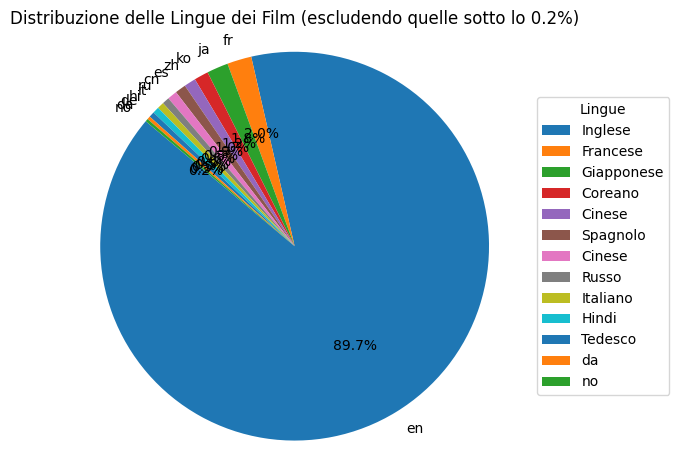

In [22]:
def iso639_to_full_name(iso_code):
    # Implementazione della tua funzione per convertire il codice ISO in nome completo
    # Ritorna il nome completo della lingua corrispondente al codice ISO
    
    # Esempio di implementazione:
    lingue_mappa = {
        "en": "Inglese",
        "fr": "Francese",
        "es": "Spagnolo",
        "it": "Italiano",
        "ja": "Giapponese",
        "ko": "Coreano",
        "zh": "Cinese",
        "cn": "Cinese",
        "ru": "Russo",
        "hi": "Hindi",
        "de": "Tedesco"
        # Aggiungi altre lingue e i loro nomi completi
    }
    return lingue_mappa.get(iso_code, iso_code)  # Ritorna il codice ISO se non è presente nella mappa

# Conta le occorrenze di ogni lingua nei film
conteggio_lingue = df["original_language"].value_counts()
# Calcola la somma di tutte le occorrenze delle lingue
totale_lingue = conteggio_lingue.sum()

# Calcola le percentuali per ciascuna lingua
percentuali_lingue = [(lingua, (occorrenze / totale_lingue) * 100) for lingua, occorrenze in conteggio_lingue.items()]

# Soglia delle percentuali da escludere
soglia_percentuale = 0.2

# Filtra le percentuali e le etichette sopra la soglia
percentuali_filtrate = [percentuale for lingua, percentuale in percentuali_lingue if percentuale >= soglia_percentuale]
etichette_filtrate = [lingua for lingua, percentuale in percentuali_lingue if percentuale >= soglia_percentuale]
codici_lingue = [lingua for lingua, percentuale in percentuali_lingue]

# Crea il grafico a torta
plt.pie(percentuali_filtrate, labels=etichette_filtrate, autopct='%1.1f%%', startangle=140)

# Aggiungi un titolo al grafico
plt.title("Distribuzione delle Lingue dei Film (escludendo quelle sotto lo 0.2%)")

# Aggiungi una legenda sul fianco
plt.legend([iso639_to_full_name(iso_code) for iso_code in codici_lingue], title="Lingue", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostra il grafico
plt.axis('equal')  # Assicura che il grafico sia disegnato come un cerchio
plt.tight_layout()  # Aggiunge spazio tra le etichette e i bordi del grafico
plt.show()

### Rilascio annuale film

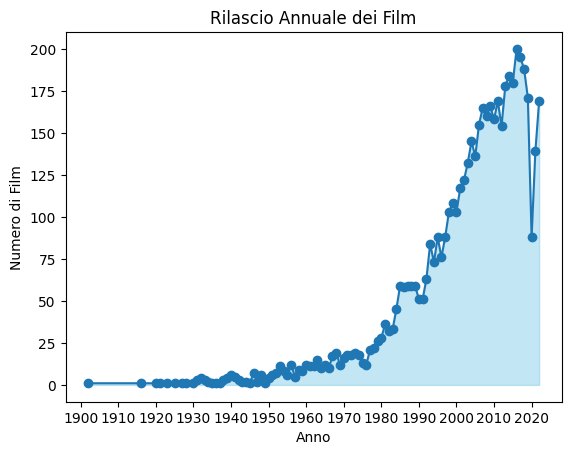

In [23]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Raggruppa i film per anno di rilascio e conta il numero di film rilasciati in ciascun anno
film_per_anno = df.groupby(df["release_date"].dt.year)["title"].count()

# Crea il grafico a linee
plt.plot(film_per_anno.index, film_per_anno.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Rilascio Annuale dei Film")
plt.xlabel("Anno")
plt.ylabel("Numero di Film")

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(film_per_anno.index, film_per_anno.values, color='skyblue', alpha=0.5)

# Imposta il locator per l'asse x per avere etichette ogni 10 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(10))

# Mostra il grafico
plt.show()

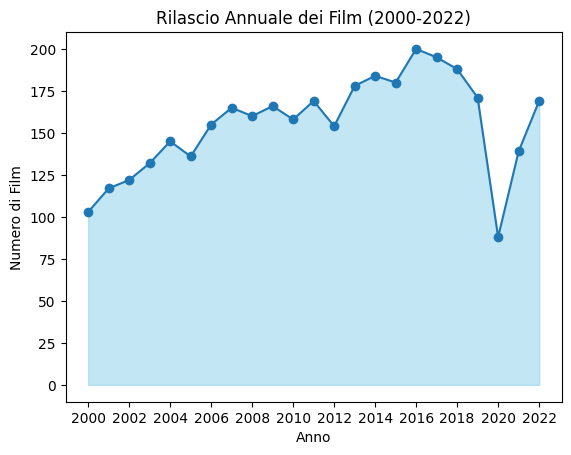

In [24]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Crea un nuovo DataFrame includendo solo i film dal 2000 in poi
df_filtered = df[df["release_date"].dt.year >= 2000]

# Raggruppa i film per anno di rilascio e conta il numero di film rilasciati in ciascun anno nel DataFrame filtrato
film_per_anno = df_filtered.groupby(df_filtered["release_date"].dt.year)["title"].count()

# Crea il grafico a linee
plt.plot(film_per_anno.index, film_per_anno.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Rilascio Annuale dei Film (2000-2022)")
plt.xlabel("Anno")
plt.ylabel("Numero di Film")

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(film_per_anno.index, film_per_anno.values, color='skyblue', alpha=0.5)

# Imposta il locator per l'asse x per avere etichette ogni 2 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))

# Mostra il grafico
plt.show()

### Rilascio mensile film

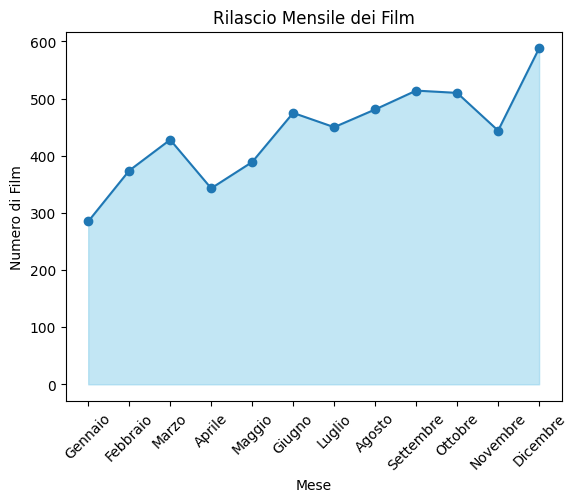

In [25]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Raggruppa i film per mese di rilascio e conta il numero di film rilasciati in ciascun mese
film_per_month = df.groupby(df["release_date"].dt.month)["title"].count()

# Crea il grafico a linee
plt.plot(film_per_month.index, film_per_month.values, marker='o')

# Imposta le etichette dell'asse x con i mesi dell'anno
mesi_dell_anno = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
plt.xticks(film_per_month.index, mesi_dell_anno, rotation=45)

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(film_per_month.index, film_per_month.values, color='skyblue', alpha=0.5)

# Aggiungi un titolo e le etichette degli assi
plt.title("Rilascio Mensile dei Film")
plt.xlabel("Mese")
plt.ylabel("Numero di Film")

# Mostra il grafico
plt.show()

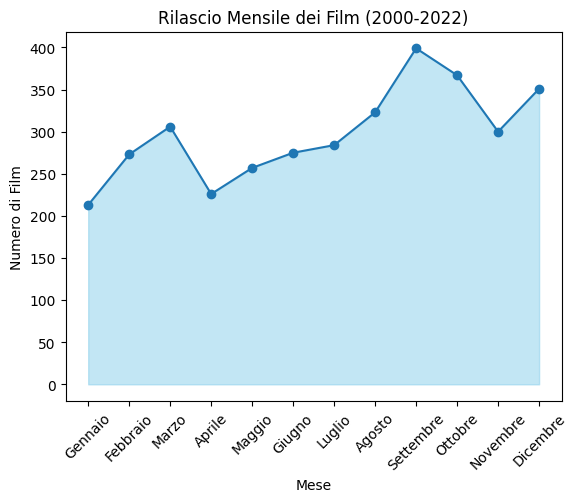

In [26]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Crea un nuovo DataFrame includendo solo i film dal 2000 in poi
df_filtered = df[df["release_date"].dt.year >= 2000]

# Raggruppa i film per mese di rilascio e conta il numero di film rilasciati in ciascun mese nel DataFrame filtrato
film_per_month = df_filtered.groupby(df_filtered["release_date"].dt.month)["title"].count()

# Crea il grafico a linee
plt.plot(film_per_month.index, film_per_month.values, marker='o')

# Imposta le etichette dell'asse x con i mesi dell'anno
mesi_dell_anno = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
plt.xticks(film_per_month.index, mesi_dell_anno, rotation=45)

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(film_per_month.index, film_per_month.values, color='skyblue', alpha=0.5)

# Aggiungi un titolo e le etichette degli assi
plt.title("Rilascio Mensile dei Film (2000-2022)")
plt.xlabel("Mese")
plt.ylabel("Numero di Film")

# Mostra il grafico
plt.show()

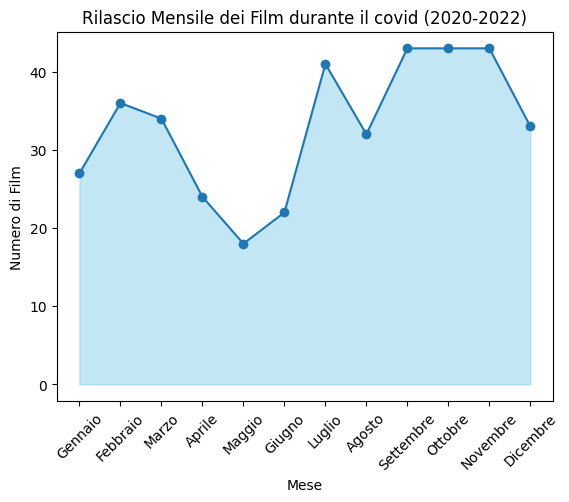

In [27]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Crea un nuovo DataFrame includendo solo i film durante il covid
df_filtered = df[df["release_date"].dt.year >= 2020]
df_filtered = df_filtered[df_filtered["release_date"].dt.year <=2022]

# Raggruppa i film per mese di rilascio e conta il numero di film rilasciati in ciascun mese nel DataFrame filtrato
film_per_month = df_filtered.groupby(df_filtered["release_date"].dt.month)["title"].count()

# Crea il grafico a linee
plt.plot(film_per_month.index, film_per_month.values, marker='o')

# Imposta le etichette dell'asse x con i mesi dell'anno
mesi_dell_anno = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
plt.xticks(film_per_month.index, mesi_dell_anno, rotation=45)

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(film_per_month.index, film_per_month.values, color='skyblue', alpha=0.5)

# Aggiungi un titolo e le etichette degli assi
plt.title("Rilascio Mensile dei Film durante il covid (2020-2022)")
plt.xlabel("Mese")
plt.ylabel("Numero di Film")

# Mostra il grafico
plt.show()

### Evoluzione budget film nel tempo

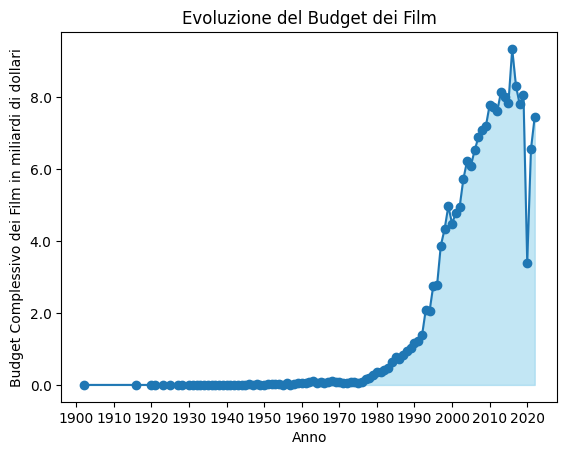

In [28]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Raggruppa i film per anno di rilascio e calcola il budget totale dei film di quell'anno
budget_per_anno = df.groupby(df["release_date"].dt.year)["budget"].sum()

# Crea il grafico a linee
plt.plot(budget_per_anno.index, budget_per_anno.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Evoluzione del Budget dei Film")
plt.xlabel("Anno")
plt.ylabel("Budget Complessivo dei Film in miliardi di dollari")

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(bilioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(budget_per_anno.index, budget_per_anno.values, color='skyblue', alpha=0.5)

# Imposta il locator per l'asse x per avere etichette ogni 10 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(10))

# Mostra il grafico
plt.show()

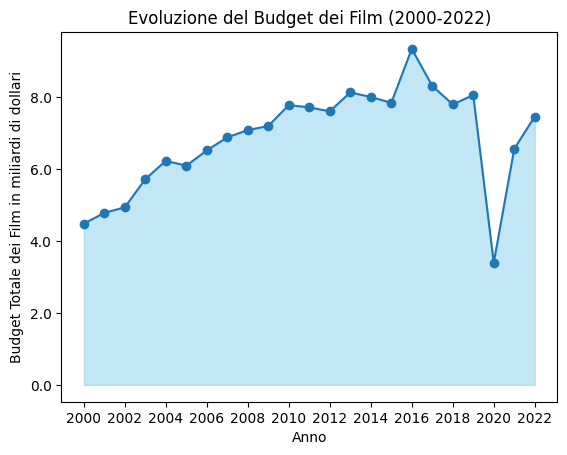

In [29]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Applica il filtro per includere solo i film dal 2000 in poi
df_filtered = df[df["release_date"].dt.year >= 2000]

# Raggruppa i film per anno di rilascio e calcola il budget totale dei film di quell'anno nel DataFrame filtrato
budget_per_anno = df_filtered.groupby(df_filtered["release_date"].dt.year)["budget"].sum()

# Crea il grafico a linee
plt.plot(budget_per_anno.index, budget_per_anno.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Evoluzione del Budget dei Film (2000-2022)")
plt.xlabel("Anno")
plt.ylabel("Budget Totale dei Film in miliardi di dollari")

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(bilioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(budget_per_anno.index, budget_per_anno.values, color='skyblue', alpha=0.5)

# Imposta il locator per l'asse x per avere etichette ogni 2 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))

# Mostra il grafico
plt.show()

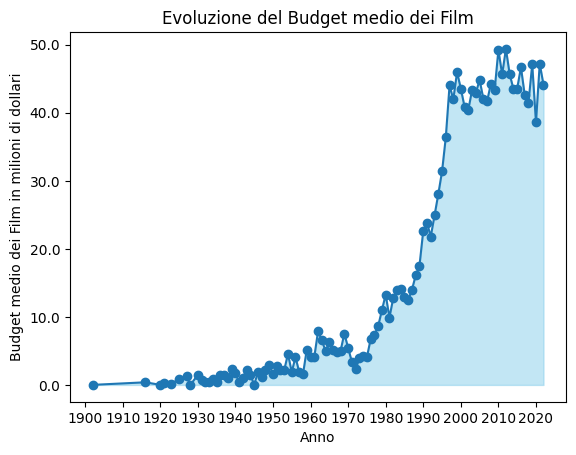

In [30]:
#budget medio
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Raggruppa i film per anno di rilascio e calcola il budget medio
budget_per_anno = df.groupby(df["release_date"].dt.year)["budget"].mean()

# Crea il grafico a linee
plt.plot(budget_per_anno.index, budget_per_anno.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Evoluzione del Budget medio dei Film")
plt.xlabel("Anno")
plt.ylabel("Budget medio dei Film in milioni di dollari")

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(milioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(budget_per_anno.index, budget_per_anno.values, color='skyblue', alpha=0.5)

# Imposta il locator per l'asse x per avere etichette ogni 10 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(10))

# Mostra il grafico
plt.show()

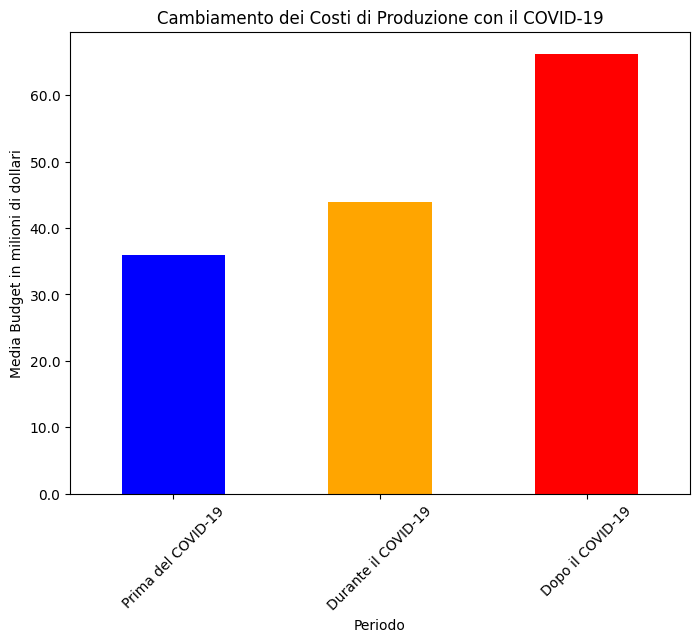

In [31]:
# Trasforma i dati in un DataFrame pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Funzione per categorizzare i film in base al periodo del COVID-19
def categorize_covid_period(row):
    release_year = pd.to_datetime(row['release_date']).year
    if release_year <= 2019:
        return 'Prima del COVID-19'
    elif release_year > 2019 and release_year <= 2022:
        return 'Durante il COVID-19'
    else:
        return 'Dopo il COVID-19'

# Aggiungi una colonna "covid_period" al DataFrame
df['covid_period'] = df.apply(categorize_covid_period, axis=1)

# Calcola la media del budget per ciascun periodo
average_budget_by_period = df.groupby('covid_period')['budget'].mean()

column_order = ['Prima del COVID-19', 'Durante il COVID-19', 'Dopo il COVID-19']

# Calcola la media del budget per ciascun periodo
average_budget_by_period = average_budget_by_period.reindex(column_order)

# Creazione dei grafici a barre
plt.figure(figsize=(8, 6))
average_budget_by_period.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel('Periodo')
plt.ylabel('Media Budget in milioni di dollari')
plt.title('Cambiamento dei Costi di Produzione con il COVID-19')
plt.xticks(rotation=45)

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(milioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Evoluzione dei ricavi dei film

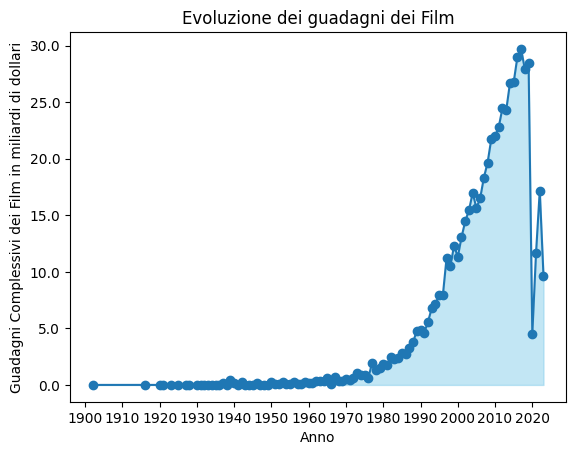

In [32]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Raggruppa i film per anno di rilascio e calcola il revenue totale dei film di quell'anno
revenue_per_anno = df.groupby(df["release_date"].dt.year)["revenue"].sum()

# Crea il grafico a linee
plt.plot(revenue_per_anno.index, revenue_per_anno.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Evoluzione dei guadagni dei Film")
plt.xlabel("Anno")
plt.ylabel("Guadagni Complessivi dei Film in miliardi di dollari")

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(revenue_per_anno.index, revenue_per_anno.values, color='skyblue', alpha=0.5)

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(bilioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Imposta il locator per l'asse x per avere etichette ogni 10 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(10))

# Mostra il grafico
plt.show()

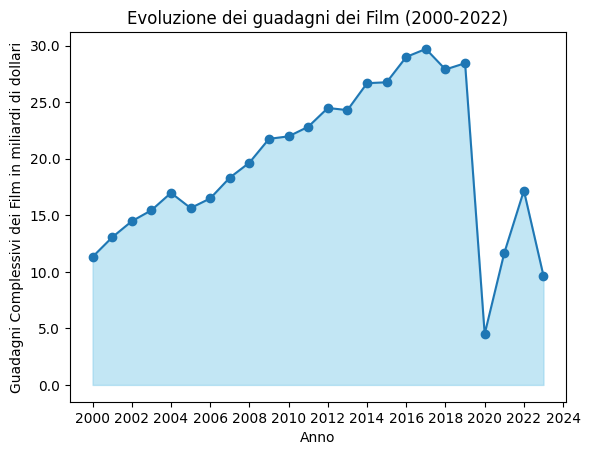

In [33]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Applica il filtro per includere solo i film dal 2000 in poi
df_filtered = df[df["release_date"].dt.year >= 2000]

# Raggruppa i film per anno di rilascio e calcola il revenue totale dei film di quell'anno
revenue_per_anno = df.groupby(df_filtered["release_date"].dt.year)["revenue"].sum()

# Crea il grafico a linee
plt.plot(revenue_per_anno.index, revenue_per_anno.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Evoluzione dei guadagni dei Film (2000-2022)")
plt.xlabel("Anno")
plt.ylabel("Guadagni Complessivi dei Film in miliardi di dollari")

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(revenue_per_anno.index, revenue_per_anno.values, color='skyblue', alpha=0.5)

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(bilioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Imposta il locator per l'asse x per avere etichette ogni 2 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))

# Mostra il grafico
plt.show()

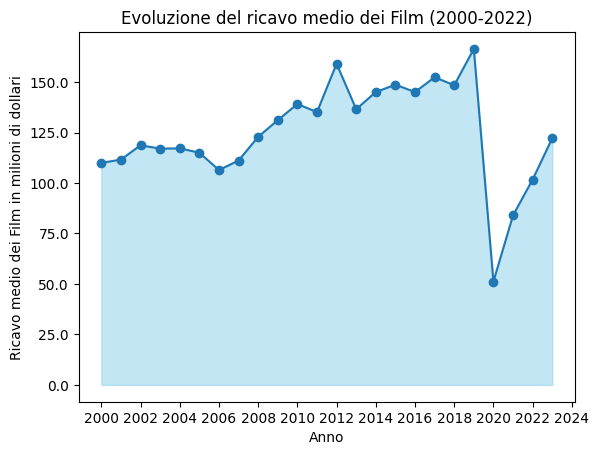

In [34]:
#ricavio medio
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Applica il filtro per includere solo i film dal 2000 in poi
df_filtered = df[df["release_date"].dt.year >= 2000]

# Raggruppa i film per anno di rilascio e calcola il revenue totale dei film di quell'anno
revenue_per_anno = df.groupby(df_filtered["release_date"].dt.year)["revenue"].mean()

# Crea il grafico a linee
plt.plot(revenue_per_anno.index, revenue_per_anno.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Evoluzione del ricavo medio dei Film (2000-2022)")
plt.xlabel("Anno")
plt.ylabel("Ricavo medio dei Film in milioni di dollari")

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(revenue_per_anno.index, revenue_per_anno.values, color='skyblue', alpha=0.5)

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(milioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Imposta il locator per l'asse x per avere etichette ogni 2 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))

# Mostra il grafico
plt.show()

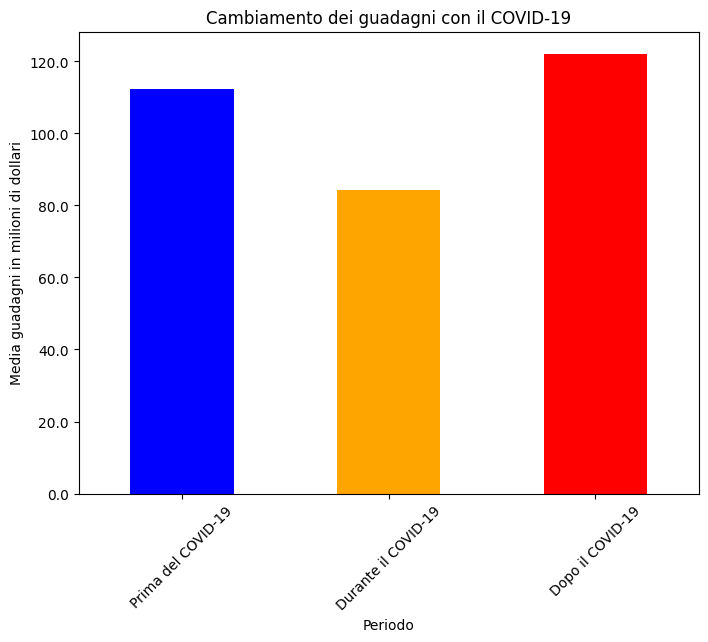

In [35]:
# Trasforma i dati in un DataFrame pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Funzione per categorizzare i film in base al periodo del COVID-19
def categorize_covid_period(row):
    release_year = pd.to_datetime(row['release_date']).year
    if release_year <= 2019:
        return 'Prima del COVID-19'
    elif release_year > 2019 and release_year <= 2022:
        return 'Durante il COVID-19'
    else:
        return 'Dopo il COVID-19'

# Aggiungi una colonna "covid_period" al DataFrame
df['covid_period'] = df.apply(categorize_covid_period, axis=1)

# Calcola la media del budget per ciascun periodo
average_budget_by_period = df.groupby('covid_period')['revenue'].mean()

column_order = ['Prima del COVID-19', 'Durante il COVID-19', 'Dopo il COVID-19']

# Calcola la media del budget per ciascun periodo
average_budget_by_period = average_budget_by_period.reindex(column_order)

# Creazione dei grafici a barre
plt.figure(figsize=(8, 6))
average_budget_by_period.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.xlabel('Periodo')
plt.ylabel('Media guadagni in milioni di dollari')
plt.title('Cambiamento dei guadagni con il COVID-19')
plt.xticks(rotation=45)

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(milioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Differenza tra i vari mercati cinematrografici

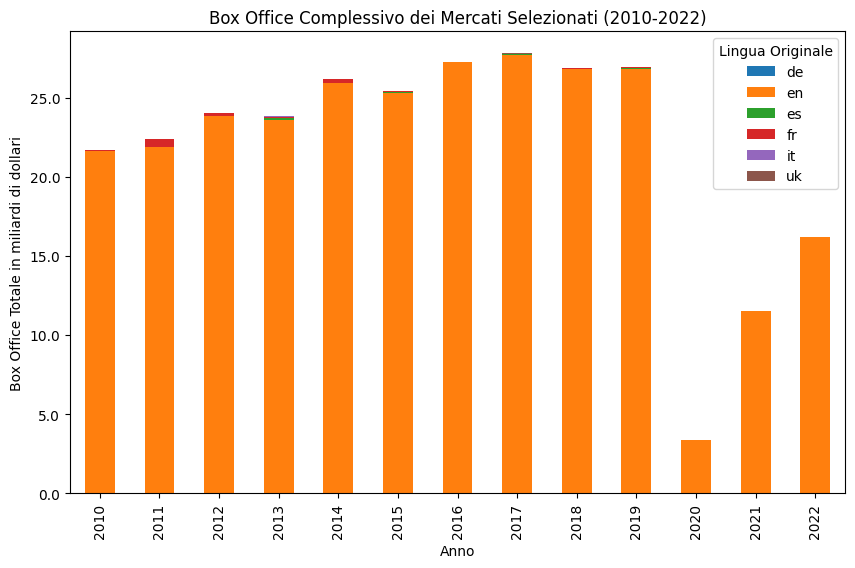

In [36]:
# Trasforma i dati in un DataFrame pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Filtra i film nell'intervallo di anni desiderato
start_year = 2010
end_year = 2022
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
filtered_df = df[(df['release_year'] >= start_year) & (df['release_year'] <= end_year)]

# Lista dei mercati da includere nel grafico
selected_markets = ['en', 'fr', 'uk', 'it', 'es', 'de']  # Aggiungi qui i codici dei mercati desiderati

# Filtra il DataFrame per includere solo i mercati selezionati
filtered_df = filtered_df[filtered_df['original_language'].isin(selected_markets)]

# Raggruppa i dati per anno e lingua originale e calcola il box office totale
grouped_df = filtered_df.groupby(['release_year', 'original_language']).sum()

# Riorganizza il DataFrame per rendere più agevole la creazione del grafico
pivot_df = grouped_df.unstack(level='original_language')['revenue']

# Creazione del grafico a barre raggruppate
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Anno')
plt.ylabel('Box Office Totale in miliardi di dollari')
plt.title('Box Office Complessivo dei Mercati Selezionati (2010-2022)')
plt.legend(title='Lingua Originale')

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(bilioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

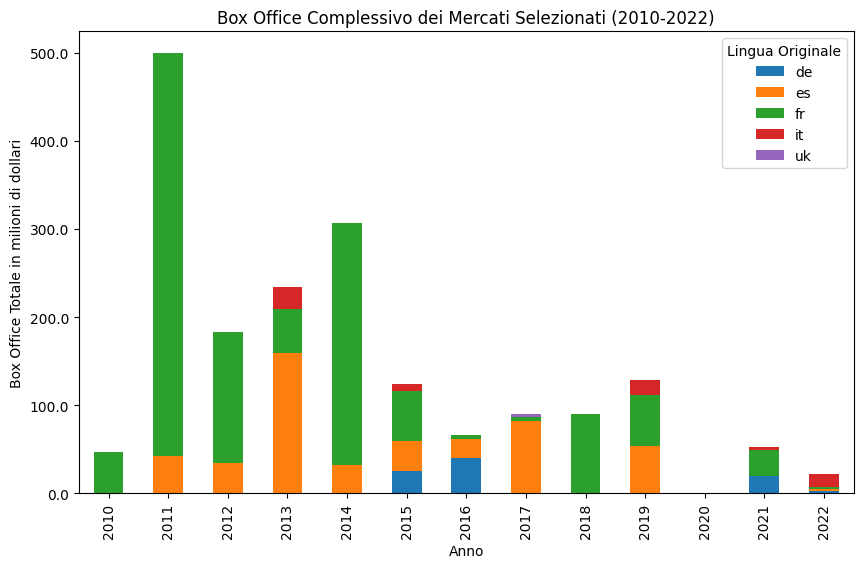

In [37]:
#senza inglesi antipatici
# Trasforma i dati in un DataFrame pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Filtra i film nell'intervallo di anni desiderato
start_year = 2010
end_year = 2022
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
filtered_df = df[(df['release_year'] >= start_year) & (df['release_year'] <= end_year)]

# Lista dei mercati da includere nel grafico
selected_markets = ['fr', 'uk', 'it', 'es', 'de']  # Aggiungi qui i codici dei mercati desiderati

# Filtra il DataFrame per includere solo i mercati selezionati
filtered_df = filtered_df[filtered_df['original_language'].isin(selected_markets)]

# Raggruppa i dati per anno e lingua originale e calcola il box office totale
grouped_df = filtered_df.groupby(['release_year', 'original_language']).sum()

# Riorganizza il DataFrame per rendere più agevole la creazione del grafico
pivot_df = grouped_df.unstack(level='original_language')['revenue']

# Creazione del grafico a barre raggruppate
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Anno')
plt.ylabel('Box Office Totale in milioni di dollari')
plt.title('Box Office Complessivo dei Mercati Selezionati (2010-2022)')
plt.legend(title='Lingua Originale')

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(milioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Grafico cumulativo di film usciti per anno

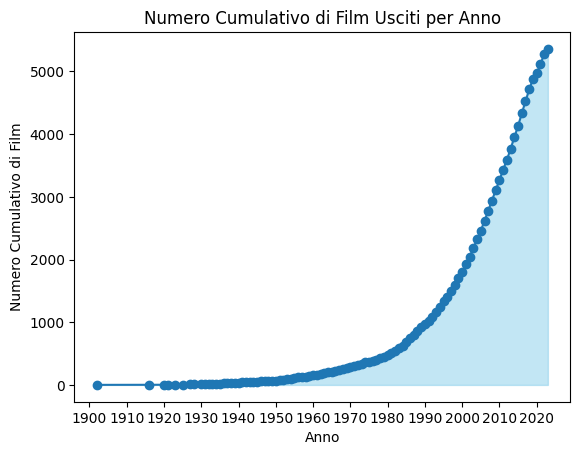

In [38]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Raggruppa i film per anno di rilascio e conta il numero di film usciti in ciascun anno
film_per_anno = df.groupby(df["release_date"].dt.year)["title"].count()

# Calcola la somma cumulativa dei film usciti ogni anno
film_cumulativi = film_per_anno.cumsum()

# Crea il grafico cumulativo a linee
plt.plot(film_cumulativi.index, film_cumulativi.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Numero Cumulativo di Film Usciti per Anno")
plt.xlabel("Anno")
plt.ylabel("Numero Cumulativo di Film")

# Individua l'anno in cui il numero cumulativo di film supera per la prima volta la soglia di 1000 film
anno_intersezione = film_cumulativi[film_cumulativi >= 1000].index[0]

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(film_cumulativi.index, film_cumulativi.values, color='skyblue', alpha=0.5)

# Imposta il locator per l'asse x per avere etichette ogni 10 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(10))

# Mostra il grafico
plt.show()

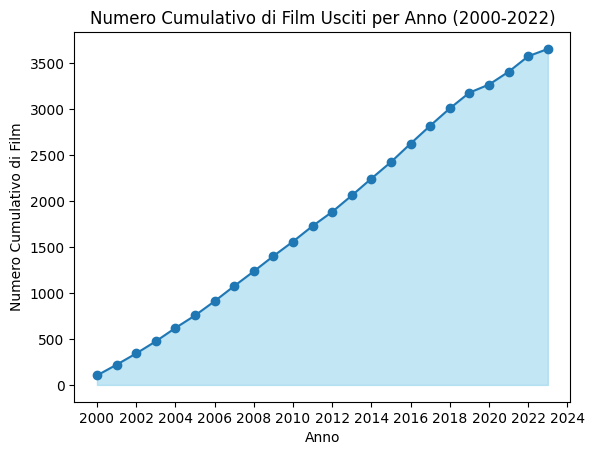

In [39]:
# Converti la colonna "release_date" in formato di data
df["release_date"] = pd.to_datetime(df["release_date"])

# Applica il filtro per includere solo i film dal 2000 in poi
df_filtered = df[df["release_date"].dt.year >= 2000]

# Raggruppa i film per anno di rilascio e conta il numero di film usciti in ciascun anno
film_per_anno = df.groupby(df_filtered["release_date"].dt.year)["title"].count()

# Calcola la somma cumulativa dei film usciti ogni anno
film_cumulativi = film_per_anno.cumsum()

# Crea il grafico cumulativo a linee
plt.plot(film_cumulativi.index, film_cumulativi.values, marker='o')

# Aggiungi un titolo e le etichette degli assi
plt.title("Numero Cumulativo di Film Usciti per Anno (2000-2022)")
plt.xlabel("Anno")
plt.ylabel("Numero Cumulativo di Film")

# Individua l'anno in cui il numero cumulativo di film supera per la prima volta la soglia di 1000 film
anno_intersezione = film_cumulativi[film_cumulativi >= 1000].index[0]

# Riempimento dello spazio sotto la linea del grafico con colore
plt.fill_between(film_cumulativi.index, film_cumulativi.values, color='skyblue', alpha=0.5)

# Imposta il locator per l'asse x per avere etichette ogni 2 anni
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))

# Mostra il grafico
plt.show()

### Distribuzione dei Ricavi per Genere

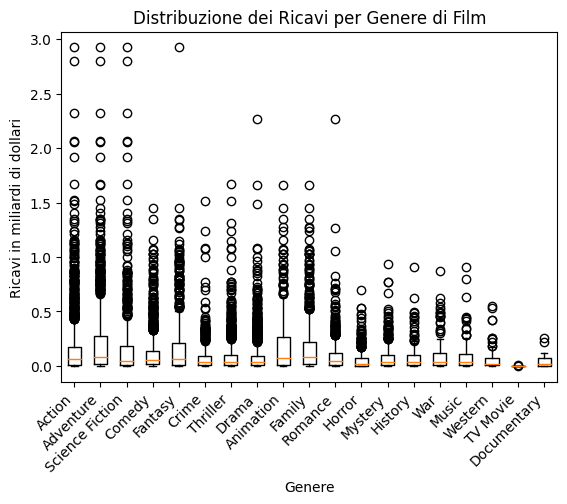

In [40]:
# Converti il dizionario in un DataFrame
dff = pd.DataFrame.from_dict(data, orient="index")


# "Srotola" la lista di generi e crea un nuovo DataFrame
df_genres = dff.explode("genres")

# Filtra solo i valori di tipo dizionario nel campo "genres"
df_genres = df_genres[df_genres["genres"].apply(lambda x: isinstance(x, dict))]

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(bilioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Crea il grafico a boxplot
plt.boxplot([df_genres[df_genres["genres"].apply(lambda x: x["name"]) == genre]["revenue"] for genre in df_genres["genres"].apply(lambda x: x["name"]).unique()])

plt.xticks(range(1, len(df_genres["genres"].apply(lambda x: x["name"]).unique()) + 1), df_genres["genres"].apply(lambda x: x["name"]).unique(), rotation=45, ha="right")
plt.subplots_adjust(bottom=0.15)  # Aggiungi spazio nella parte inferiore per le etichette

# Aggiungi un titolo e le etichette degli assi
plt.title("Distribuzione dei Ricavi per Genere di Film")
plt.xlabel("Genere")
plt.ylabel("Ricavi in miliardi di dollari")

# Mostra il grafico
plt.show()

### Distribuzione del budget per Genere

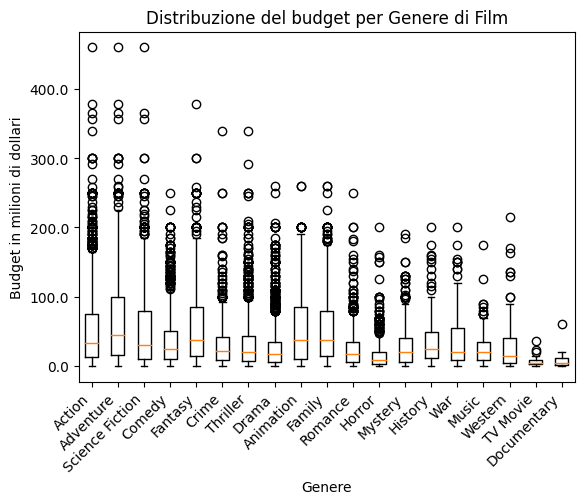

In [41]:
# Converti il dizionario in un DataFrame
dff = pd.DataFrame.from_dict(data, orient="index")

# "Srotola" la lista di generi e crea un nuovo DataFrame
df_genres = dff.explode("genres")

# Filtra solo i valori di tipo dizionario nel campo "genres"
df_genres = df_genres[df_genres["genres"].apply(lambda x: isinstance(x, dict))]

# Imposta il formatter per l'asse y per mostrare i valori in miliardi
formatter = FuncFormatter(milioni_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Crea il grafico a boxplot
plt.boxplot([df_genres[df_genres["genres"].apply(lambda x: x["name"]) == genre]["budget"] for genre in df_genres["genres"].apply(lambda x: x["name"]).unique()])

plt.xticks(range(1, len(df_genres["genres"].apply(lambda x: x["name"]).unique()) + 1), df_genres["genres"].apply(lambda x: x["name"]).unique(), rotation=45, ha="right")
plt.subplots_adjust(bottom=0.15)  # Aggiungi spazio nella parte inferiore per le etichette

# Aggiungi un titolo e le etichette degli assi
plt.title("Distribuzione del budget per Genere di Film")
plt.xlabel("Genere")
plt.ylabel("Budget in milioni di dollari")

# Mostra il grafico
plt.show()

### Distribuzione della durata per genere di film

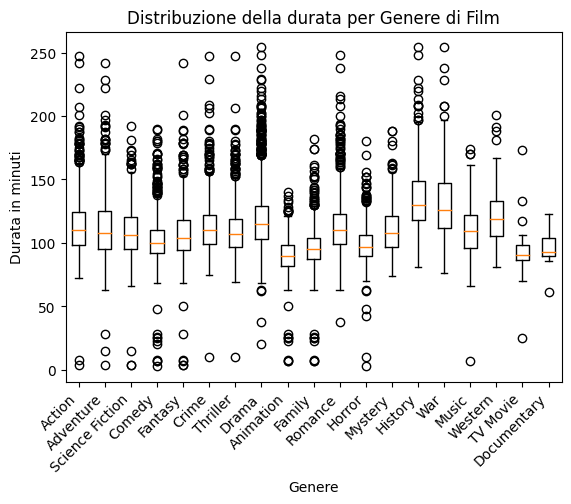

In [42]:
# Converti il dizionario in un DataFrame
dff = pd.DataFrame.from_dict(data, orient="index")

# "Srotola" la lista di generi e crea un nuovo DataFrame
df_genres = dff.explode("genres")

# Filtra solo i valori di tipo dizionario nel campo "genres"
df_genres = df_genres[df_genres["genres"].apply(lambda x: isinstance(x, dict))]

# Crea il grafico a boxplot
plt.boxplot([df_genres[df_genres["genres"].apply(lambda x: x["name"]) == genre]["runtime"] for genre in df_genres["genres"].apply(lambda x: x["name"]).unique()])

plt.xticks(range(1, len(df_genres["genres"].apply(lambda x: x["name"]).unique()) + 1), df_genres["genres"].apply(lambda x: x["name"]).unique(), rotation=45, ha="right")
plt.subplots_adjust(bottom=0.15)  # Aggiungi spazio nella parte inferiore per le etichette

# Aggiungi un titolo e le etichette degli assi
plt.title("Distribuzione della durata per Genere di Film")
plt.xlabel("Genere")
plt.ylabel("Durata in minuti")

# Mostra il grafico
plt.show()

### Servizi di streaming: crescita a confronto

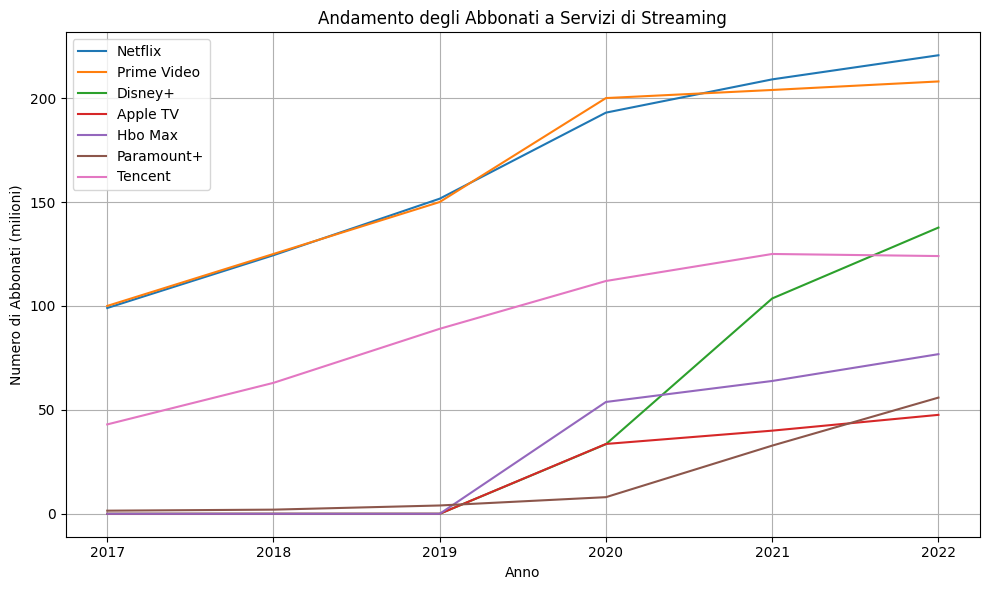

In [43]:
#fonte: https://www.statista.com/outlook/dmo/digital-media/video-on-demand/video-streaming-svod/worldwide#users


anni = [2017, 2018, 2019, 2020, 2021, 2022]
appletv_abbonati = [0,0,0,33.6,40,47.6]
disney_plus_abbonati = [0,0,0,33.5,103.6,137.7]
hbomax_abbonati = [0,0,0,53.8,63.9,76.8]
paramaount_abbonati = [1.5,2,4,8,32.8,55.9]
tencent_abbonati = [43,63,89,112,125,124]
netflix_abbonati = [99,124.4,151.6,193,209,220.6]
prime_video_abbonati = [100, 125, 150, 200, 203.9, 208]


# Creazione del grafico
plt.figure(figsize=(10, 6))

plt.plot(anni, netflix_abbonati, label="Netflix")
plt.plot(anni, prime_video_abbonati, label="Prime Video")
plt.plot(anni, disney_plus_abbonati, label="Disney+")
plt.plot(anni, appletv_abbonati, label="Apple TV")
plt.plot(anni, hbomax_abbonati, label="Hbo Max")
plt.plot(anni, paramaount_abbonati, label="Paramount+")
plt.plot(anni, tencent_abbonati, label="Tencent")

plt.xlabel("Anno")
plt.ylabel("Numero di Abbonati (milioni)")
plt.title("Andamento degli Abbonati a Servizi di Streaming")
plt.legend()

plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

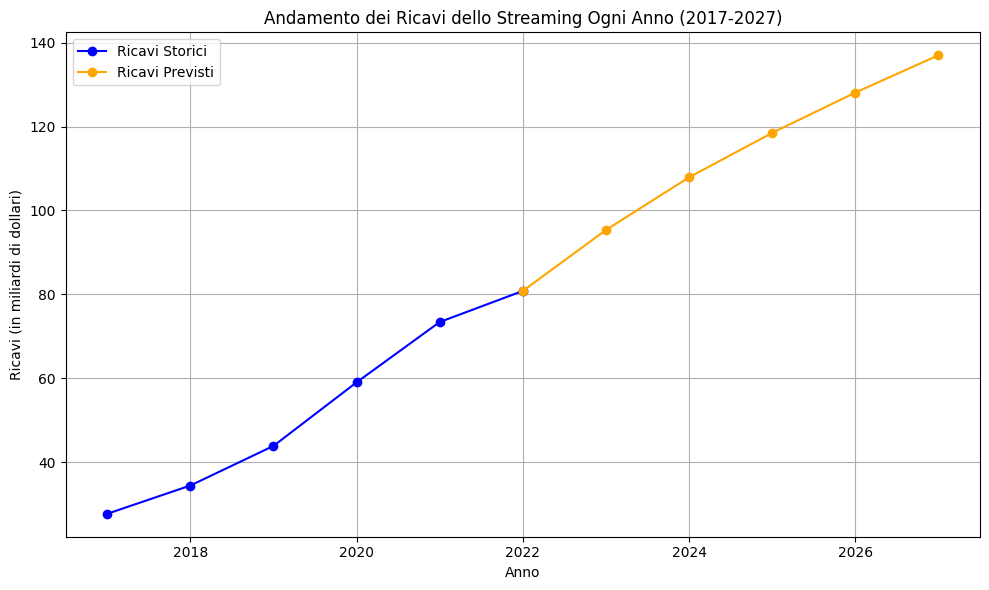

In [44]:
# Dati dei ricavi storici
anni_storici = list(range(2017, 2023))
ricavi_storici = [27.68, 34.42, 43.86, 59.02, 73.4, 80.81]

# Dati dei ricavi previsti
anni_previsti = list(range(2022, 2028))
ricavi_previsti = [80.81, 95.35, 107.90, 118.50, 128.10, 137.00]

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Dati storici
plt.plot(anni_storici, ricavi_storici, color='blue', label='Ricavi Storici', marker='o')

# Dati previsti
plt.plot(anni_previsti, ricavi_previsti, color='orange', label='Ricavi Previsti', marker='o')

plt.xlabel("Anno")
plt.ylabel("Ricavi (in miliardi di dollari)")
plt.title("Andamento dei Ricavi dello Streaming Ogni Anno (2017-2027)")
plt.legend()

plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b17472ce-9019-45c2-b7a5-003e54110578' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>